In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML스터디프로젝트/Boston Housing Price(medv).csv')

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [ ]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [ ]:
x_data= df.drop(['MEDV','CAT. MEDV'],axis=1, inplace=False)
target = df[["MEDV"]]
x_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
#상수항 추가
x_data_ = sm.add_constant(x_data, has_constant='add')
#회귀모델 적합
multi_model = sm.OLS(target, x_data_)
fitted_multi_model = multi_model.fit()

#결과 출력
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          6.72e-135
Time:                        05:55:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

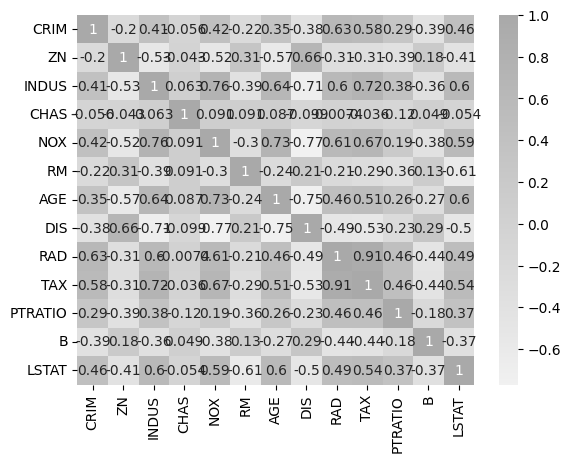

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cmap = sns.light_palette("darkgray",as_cmap=True)
sns.heatmap(x_data.corr(),annot=True, cmap=cmap)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


In [ ]:
import pandas as pd

print(x_data.values)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
from patsy import dmatrix
df_columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD', 'LSTAT', 'B', 'TAX']
dfX0 = pd.DataFrame(x_data,columns=df_columns)

formula = "scale(CRIM) + scale(ZN) + scale(INDUS) + scale(CHAS) + scale(NOX) + scale(RM) + scale(AGE) + scale(DIS) + scale(RAD) + scale(LSTAT) + scale(B) + scale(TAX) "
dfX = dmatrix(formula, dfX0, return_type = "dataframe")
dfy = pd.DataFrame(target, columns=["MEDV"])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.000000,Intercept
1,1.064574,scale(CHAS)
2,1.347004,scale(B)
3,1.791405,scale(CRIM)
4,1.884565,scale(RM)
5,2.076173,scale(ZN)
6,2.935425,scale(LSTAT)
7,3.081867,scale(AGE)
8,3.916373,scale(NOX)
9,3.921277,scale(DIS)


In [ ]:
multi_model2 = sm.OLS(target, dfX)
fitted_multi_model2 = multi_model2.fit()
fitted_multi_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          4.56e-125
Time:                        06:28:25   Log-Likelihood:                -1524.7
No. Observations:                 506   AIC:                             3075.
Df Residuals:                     493   BIC:                             3130.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.5328      0.222    101.587      0.000      22.097      22.969
scale(CRIM)     -0.8851      0.297     -2.981      0.003      -1.468      -0.302
scale(ZN)        1.8064      0.320      5.652      0.000       1.178       2.434
scale(INDUS)    -0.2578      0.439     -0.587      0.558      -1.121       0.605
scale(CHAS)      0.8309      0.229      3.630      0.000       0.381       1.281
scale(NOX)      -0.9953      0.439     -2.267      0.024      -1.858      -0.133
scale(RM)        3.0149      0.304      9.901      0.000       2.417       3.613
scale(AGE)      -0.1921      0.389     -0.493      0.622      -0.957       0.573
scale(DIS)      -3.3901      0.439     -7.718      0.000      -4.253      -2.527
scale(RAD)       1.8682      0.596      3.135      0.002       0.697       3.039
scale(LSTAT)    -3.8633      0.380    -10.166      0.000      -4.610      -3.117
scale(B)         0.7894      0.257      3.067      0.002       0.284       1.295
scale(TAX)      -2.4247      0.664     -3.653      0.000      -3.729      -1.120
==============================================================================
Omnibus:                      161.318   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.859
Skew:                           1.411   Prob(JB):                    5.59e-136
Kurtosis:                       7.645   Cond. No.                         9.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
dfX.drop(['Intercept','scale(RAD)','scale(AGE)','scale(TAX)','scale(INDUS)'],axis=1,inplace=False)

,scale(CRIM),scale(ZN),scale(CHAS),scale(NOX),scale(RM),scale(DIS),scale(LSTAT),scale(B)
0,-0.419782,0.284830,-0.272599,-0.144217,0.413672,0.140214,-1.075562,0.441052
1,-0.417339,-0.487722,-0.272599,-0.740262,0.194274,0.557160,-0.492439,0.441052
2,-0.417342,-0.487722,-0.272599,-0.740262,1.282714,0.557160,-1.208727,0.396427
3,-0.416750,-0.487722,-0.272599,-0.835284,1.016303,1.077737,-1.361517,0.416163
4,-0.412482,-0.487722,-0.272599,-0.835284,1.228577,1.077737,-1.026501,0.441052
...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,-0.272599,0.158124,0.439316,-0.625796,-0.418147,0.387217
502,-0.415249,-0.487722,-0.272599,0.158124,-0.234548,-0.716639,-0.500850,0.441052
503,-0.413447,-0.487722,-0.272599,0.158124,0.984960,-0.773684,-0.983048,0.441052
504,-0.407764,-0.487722,-0.272599,0.158124,0.725672,-0.668437,-0.865302,0.403225


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
X=dfX
y=target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=156
                                               )

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)


CV:  0.8099762695938424
R2_score (train):  0.9188295115734139
R2_score (test):  0.8815576710000336
RMSE:  2.904938995899247


In [ ]:
from sklearn.linear_model import Ridge
R_model = Ridge()
R_model.fit(X_train,y_train)

Ridge()

In [ ]:
R_model.score(X_test,y_test)

0.7149457291992062

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.8098694588255546
R2_score (train):  0.9159900225090588
R2_score (test):  0.8820338162328734
RMSE:  2.8990941016927576
